## Package Imports

In [64]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn import decomposition

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.ensemble import VotingClassifier
import random
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings("ignore")



### Toy data 

In [8]:
train_data = pd.read_csv('HousingTrain.csv')

#going to try to predict price
train_data.head(2)

#cleaning to do --> convert category to binary

test_data = pd.read_csv('HousingTest.csv')
test_data.head(2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,43920,77,0,1,93,48540,8,6,2003,1,1,7470,7023,451,1,7,4396723.3,Basic
1,29637,21,1,0,80,70145,7,9,1998,0,0,9015,6762,303,0,0,2973981.8,Basic


### 0: Preprocessing the Data 
(clean the data before splitting into x and y portions)

In [9]:
def label_encode(data):
    
    """
    NOTE: use .dropna() to remove missing values
    
    Takes in a datarframe and converts all data columns that are of
    object data type into numerical feilds
    """
    
    encoder = LabelEncoder()
    # columns that are categorical/of object data type
    cols = data.select_dtypes(include='O').columns
    

    for col in cols:
        # Label encoding each column and overwritting it
        data[col] = encoder.fit_transform(data[col])
        
        
    return data

In [10]:
#the cleaning has to be done on both the train and test portions

data = train_data

train_data = label_encode(data)

In [12]:

data = test_data

test_data = label_encode(data)

### Split into X & Y Portions + Train & Test Portions
functions will only work for pre-split data!

In [18]:
#SPLIT INTO TRAIN AND TEST PORTIONS
xtrain = train_data.drop('price', axis = 1)
ytrain = train_data['price']
feature_names = xtrain.columns

xtest = test_data.drop('price', axis = 1)
ytest = test_data['price']


# Linear Regression

#### CV (on test folds) of Linear Regression + PCA

In [85]:
def cv_lin_reg(xtrain,ytrain):
    """
    Get a sense of the models aggregate performance via CV
    
    """
    
    #preprocess
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    xtrain = scaler1.fit_transform(xtrain)
    ytrain = scaler2.fit_transform(np.array(ytrain).reshape(-1,1))
    
    
    print('--- CROSS-VALIDATION ---')
    model = linear_model.LinearRegression()
    # Define the scoring metrics for regression
    scoring = ['r2', 'neg_mean_squared_error']

    cv_results = cross_validate(model, xtrain, ytrain, cv=5, scoring=scoring)
    r2_score = np.mean(cv_results['test_r2'])
    mse_score = -np.mean(cv_results['test_neg_mean_squared_error'])

    print(f'Mean Squared Error (average - loss/error metric): {mse_score}')
    print(f'R-squared (average - evalaution metric): {r2_score}')
    
    
    #PCA For plotting
    n_components = 1
    pca = PCA(n_components=n_components)
    pca_x = pca.fit_transform(xtrain)

    pc1 = pca_x[:, 0]
    # Plot PC1 against ytrain
    plt.scatter(pc1, ytrain)
    plt.xlabel('PC1')
    plt.ylabel('Target Variable (ytrain)')
    plt.title('Principal Component 1 vs. Target Variable')
    plt.show()
    

--- CROSS-VALIDATION ---
Mean Squared Error (average - loss/error metric): 4.3651687356611106e-07
R-squared (average - evalaution metric): 0.9999995634432585


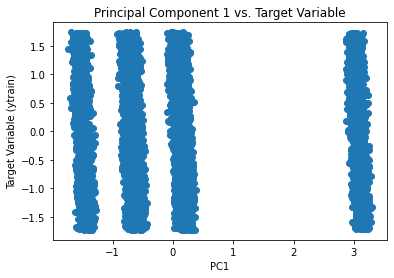

In [86]:
xtrain = xtrain
ytrain = ytrain
cv_lin_reg(xtrain,ytrain)

#### Full Lin Reg Algo + PCA Plots

In [95]:
def lin_reg(xtrain,ytrain,xtest,ytest,feature_names):
    
    """
    Works for multi-linear regression
    
    """
    
    #preprocessing
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    
    #scaling the x data
    xtrain = scaler1.fit_transform(xtrain)
    xtest = scaler1.transform(xtest)
    #scaling the y data and ensuring the data is stored as a 2D array
    ytrain = scaler2.fit_transform(np.array(ytrain).reshape(-1,1))
    ytest = scaler2.transform(np.array(ytest).reshape(-1,1))

    
    #no need to split
    
    # Create linear regression object 
    model = linear_model.LinearRegression()
    model.fit(xtrain,ytrain)
    
    
    print('--- MODEL EVALUATION ---')
    ypred = model.predict(xtest)
    ypred_unscaled = scaler2.inverse_transform(ypred)
    print(f'First few predicted classes on xtest:\n{ypred_unscaled[:5]}')
    
    #tells us about feature importance
    print("\nCoefficients: \n", model.coef_)
    
    #MSE: Standardized loss function (squared disparity between predicted and actual values)
    print("\nMSE (train) {loss-function}: %.2f" % mean_squared_error(ytrain, model.predict(xtrain)))
    print("MSE (test) {loss-function}: %.2f" % mean_squared_error(ytest, ypred))

    #what percent of the variance in the target is explained by the features?
    print("R2 (train) {evaluation metric}: %.2f" % r2_score(ytrain, model.predict(xtrain)))
    print("R2 (test) {evaluation metric}: %.2f" % r2_score(ytest, ypred))
    
    
    print('\n--- CV and Instance Prediction ---')
    lin_reg = linear_model.LinearRegression()
    mse_scores = cross_val_score(lin_reg, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation MSE (training) (5 folds):", ((-1*np.mean(mse_scores))*100).round(2))
    mse_scores2 = cross_val_score(lin_reg, xtest, ytest, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation MSE (testing) (5 folds):", ((-1*np.mean(mse_scores2))*100).round(2))

    
    #prediction @ a specific point
    #not sure that this is fitting to both?
    lin_reg.fit(xtrain,ytrain)
    #lin_reg.fit(xtest,ytest)
    new_x = [[2.4,2,4,5,6,7,8,9,1,2,4,5,6,7,8,9,5]]
    #must scale this new x
    new_x = scaler1.transform(new_x)
    new_pred = lin_reg.predict(new_x)
    print("Predictions for new data:", scaler2.inverse_transform(new_pred))
    #print("Predictions for new data:", scaler2.inverse_transform(new_pred[:,np.newaxis]))
    
    
    if xtest.shape[1] == 1:
        #only works when x data only has 1 feature --> else need to pca
        plt.figure(1)
        #scatter the points representing the test values: actual test input and actaul test label
        plt.scatter(xtest, ytest[:,0], color="black")
        #while the line represents the values predicted on test
        plt.plot(xtest, ypred, color="blue", linewidth=3)
        plt.title('Scatter of Actual Points -- Line of Predictions on Test')
        plt.xlabel('xtest')
        plt.ylabel('ytest')
        plt.show()

        
    #Are the point linearly scattered? Do residuals have a constant variance?
    plt.figure(2)
    plt.title('Predictions on Y Versus Actaul Y Values {Residual Plot}')
    #here we scatter the predictions on test versus the actaul variables on test
    plt.scatter(ypred,ytest)
    plt.xlabel('predictions')
    plt.ylabel('true')
    
    plt.figure(3)
    pca = PCA(n_components =1)
    #PCA the test data
    pca.fit(xtest)
    #but only transformt the xtest data
    pca_test = pca.transform(xtest)   
    plt.scatter(pca_test, ytest[:,0], color = 'black', label = 'test data (truth labels)')
    plt.scatter(pca_test, ypred, color = 'blue', label = 'predictions')
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('Scaled, PCA, X Test Data')
    plt.show()

--- MODEL EVALUATION ---
First few predicted classes on xtest:
[[4400982.56668683]
 [2971635.43883116]
 [8784141.26490064]
 [  22835.3452082 ]
 [ 148151.48243835]]

Coefficients: 
 [[ 1.00000674e+00  3.22067364e-06  5.24761376e-04  5.18734074e-04
   5.48164959e-04 -8.98946933e-06  4.53033772e-05  6.24769711e-07
  -7.32612121e-06  2.90715361e-05  2.43396074e-05 -1.21928190e-06
  -5.42921717e-06  1.19781353e-05  2.35294583e-06 -6.15926616e-06
  -3.43535326e-06]]

MSE (train) {loss-function}: 0.00
MSE (test) {loss-function}: 0.00
R2 (train) {evaluation metric}: 1.00
R2 (test) {evaluation metric}: 1.00

--- CV and Instance Prediction ---
Cross-validation MSE (training) (5 folds): 0.0
Cross-validation MSE (testing) (5 folds): 0.0
Predictions for new data: [[33558.10553266]]


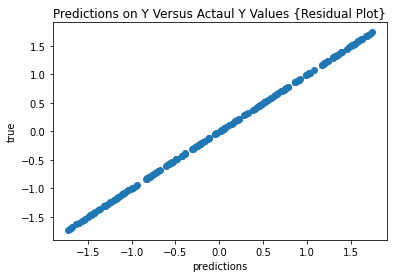

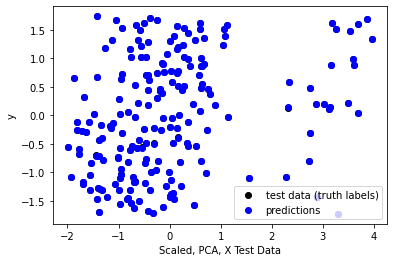

In [96]:
xtrain = xtrain
ytrain = ytrain
xtest = xtest
ytest = ytest
feature_names = feature_names

lin_reg(xtrain,ytrain,xtest,ytest,feature_names)

# Lasso Regression (Linear)

#### CV - Average Performance of Lasso Regression

In [115]:
def cv_lasso(xtrain,ytrain):
    
    print('--- CROSS-VALIDATION ---')
    model = linear_model.Lasso(alpha=0.1)
    # Define the scoring metrics for regression
    scoring = ['r2', 'neg_mean_squared_error']

    cv_results = cross_validate(model, xtrain, ytrain, cv=5, scoring=scoring)
    r2_score = np.mean(cv_results['test_r2'])
    mse_score = -np.mean(cv_results['test_neg_mean_squared_error'])

    print(f'Mean Squared Error (average - loss/error metric): {mse_score}')
    print(f'R-squared (average - evalaution metric): {r2_score}')
    

In [116]:
xtrain= xtrain
ytrain= ytrain

cv_lasso(xtrain,ytrain)

--- CROSS-VALIDATION ---
Mean Squared Error (average - loss/error metric): 3613657.9421647685
R-squared (average - evalaution metric): 0.9999995634478506


#### Full Algo

In [112]:
def lasso_reg(xtrain, ytrain, xtest, ytest):
    
    # Preprocessing
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    
    # Scaling the data
    xtrain = scaler1.fit_transform(xtrain)
    xtest = scaler1.transform(xtest)
    ytrain = scaler2.fit_transform(np.array(ytrain).reshape(-1, 1))
    ytest = scaler2.transform(np.array(ytest).reshape(-1, 1))
    
    #apply the lasso model, which penalize features that are too impactful on predictions
    model = linear_model.Lasso(alpha=0.1)  # Set the regularization parameter (alpha)
    model.fit(xtrain, ytrain)
    
    print("--- MODEL EVALUATION ---")
    ypred = (model.predict(xtest)).reshape(-1,1)
    ypred_unscaled = scaler2.inverse_transform(ypred)
    print(f"First few predicted classes on xtest:\n{ypred_unscaled[:5]}")
    
    # Feature Importance
    print("\nCoefficients (Feature Importances): \n", model.coef_)
    
    # Loss and Evaluation Metrics
    print("\nMSE (train): %.2f" % mean_squared_error(ytrain, model.predict(xtrain)))
    print("MSE (test): %.2f" % mean_squared_error(ytest, ypred))
    print("R2 (train): %.2f" % r2_score(ytrain, model.predict(xtrain)))
    print("R2 (test): %.2f" % r2_score(ytest, ypred))
    
    
    print("\n--- PREDICTION @ NEW DATA ---")
    xv = scaler1.transform([[2.4, 2, 4, 5, 6, 7, 8, 9, 1, 2, 4, 5, 6, 7, 8, 9, 5]])
    predv = (model.predict(xv)).reshape(-1,1)
    print("Predictions for new data:", scaler2.inverse_transform(predv))
    
    if xtest.shape[1] == 1:
        # Scatter plot of actual vs. predicted values
        plt.figure(1)
        plt.scatter(xtest, ytest[:, 0], color="black")
        plt.plot(xtest, ypred, color="blue", linewidth=3)
        plt.title("Scatter of Actual Points -- Line of Predictions on Test")
        plt.xlabel("xtest")
        plt.ylabel("ytest")
        plt.show()

        # Residual plot
        plt.figure(2)
        plt.scatter(ypred, ytest)
        plt.xlabel("predictions")
        plt.ylabel("true")
        plt.title("Predictions on Y Versus Actaul Y Values {Residual Plot}")
        plt.show()
    
    

In [113]:
xtrain = xtrain
ytrain = ytrain
xtest = xtest
ytest= ytest

lasso_reg(xtrain, ytrain, xtest, ytest)

--- MODEL EVALUATION ---
First few predicted classes on xtest:
[[4457909.47590953]
 [3172447.68467433]
 [8403574.27949018]
 [ 518814.63037411]
 [ 631583.91024653]]

Coefficients (Feature Importances): 
 [ 0.89999936  0.         -0.         -0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.        ]

MSE (train): 0.01
MSE (test): 0.01
R2 (train): 0.99
R2 (test): 0.99

--- PREDICTION @ NEW DATA ---
Predictions for new data: [[505350.71635264]]


# Quadratic Regression

#### CV For Average Model Performance

In [90]:
def cv_quad(xtrain,ytrain):
    
    # --- PREPROCESSING ---
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    
    xtrain = scaler1.fit_transform(xtrain)

    #adding polynomial features to the xdata
    poly = PolynomialFeatures(degree =2, include_bias = False)
    xtrain = poly.fit_transform(xtrain)

    #scaling on y + ensuring that y is in the format of a 2D array
    ytrain = scaler2.fit_transform(np.array(ytrain).reshape(-1,1))

    
    print('--- CROSS-VALIDATION ---')
    model = linear_model.LinearRegression()
    # Define the scoring metrics for regression
    scoring = ['r2', 'neg_mean_squared_error']

    cv_results = cross_validate(model, xtrain, ytrain, cv=5, scoring=scoring)
    r2_score = np.mean(cv_results['test_r2'])
    mse_score = -np.mean(cv_results['test_neg_mean_squared_error'])

    print(f'Mean Squared Error (average - loss/error metric): {mse_score}')
    print(f'R-squared (average - evalaution metric): {r2_score}')
    
    
    #PCA For plotting
    n_components = 1
    pca = PCA(n_components=n_components)
    pca_x = pca.fit_transform(xtrain)

    pc1 = pca_x[:, 0]
    # Plot PC1 against ytrain
    plt.scatter(pc1, ytrain)
    plt.xlabel('PC1')
    plt.ylabel('Target Variable (ytrain)')
    plt.title('Principal Component 1 vs. Target Variable')
    plt.show()
    
    

--- CROSS-VALIDATION ---
Mean Squared Error (average - loss/error metric): 4.4531178534859887e-07
R-squared (average - evalaution metric): 0.9999995546544931


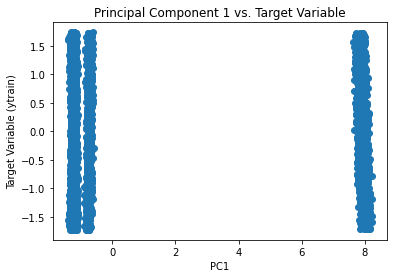

In [91]:
xtrain = xtrain
ytrain = ytrain

cv_quad(xtrain,ytrain)

#### Full Algo

In [62]:
def quad_reg(xtrain,ytrain,xtest,ytest,feature_names):
    
    # --- PREPROCESSING ---
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    
    xtrain = scaler1.fit_transform(xtrain)
    xtest = scaler1.transform(xtest)
    
    #part of preprocessing includes adding polynomial features to the xdata
    #creating the instance specifying quadratic features
    poly = PolynomialFeatures(degree =2, include_bias = False)
    #transform x so it has quadratic features
    xtrain = poly.fit_transform(xtrain)
    xtest = poly.transform(xtest)
    
    #scaling on y + ensuring that y is in the format of a 2D array
    ytrain = scaler2.fit_transform(np.array(ytrain).reshape(-1,1))
    ytest = scaler2.transform(np.array(ytest).reshape(-1,1))
    
    
    #instantate a model, it is still a linear regresion model
    # we simply transform features to include quadratics
    model = linear_model.LinearRegression()
    model.fit(xtrain,ytrain)
    
    print('--- MODEL EVALUATION ---')
    ypred = model.predict(xtest)
    ypred_unscaled = scaler2.inverse_transform(ypred)
    print(f'First few predicted classes on xtest:\n{ypred_unscaled[:5]}')
    
    #SCALED coefficents + learn about feature importance
    print("\nCoefficients: \n", model.coef_)
    
    #aggregate error between predicted values and ground truth labels
    print("\nMSE (train) {loss-function}: %.2f" % mean_squared_error(ytrain, model.predict(xtrain)))
    print("MSE (test) {loss-function}: %.2f" % mean_squared_error(ytest, ypred))
    
    #how 'well' do the features explain the variation in y?
    print("R2 (train) {evaluation metric}: %.2f" % r2_score(ytrain, model.predict(xtrain)))
    print("R2 (test) {evaluation metric}: %.2f" % r2_score(ytest, ypred))

    
    print('\n--- CV and Instance Prediction ---')
    lin_reg = linear_model.LinearRegression()
    mse_scores = cross_val_score(lin_reg, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation MSE (training) (5 folds):", ((-1*np.mean(mse_scores))*100).round(2))
    mse_scores2 = cross_val_score(lin_reg, xtest, ytest, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation MSE (testing) (5 folds):", ((-1*np.mean(mse_scores2))*100).round(2))
    
    #ENTER A NEW DATA POINT HERE
    #we take in the data & preprocess --> scale it + transform to include
    #quadratic forms
    xv = scaler1.transform([[2.3,4]])
    xv = poly.transform(xv)
    predv = scaler2.inverse_transform((model.predict(xv)))
    print("Predictions for new data:", predv)
    
    
    
    #PLOTS
    #Are the point linearly scattered? Do residuals have a constant variance?
    plt.figure(2)
    plt.title('Predictions on Y Versus Actaul Y Values {Residual Plot}')
    #here we scatter the predictions on test versus the actaul variables on test
    plt.scatter(ypred,ytest)
    plt.xlabel('predictions')
    plt.ylabel('true')
    
    plt.figure(3)
    pca = PCA(n_components =1)
    #PCA the test data
    pca.fit(xtest)
    #but only transformt the xtest data
    pca_test = pca.transform(xtest)   
    plt.scatter(pca_test, ytest[:,0], color = 'black', label = 'test data (truth labels)')
    plt.scatter(pca_test, ypred, color = 'blue', label = 'predictions')
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('Scaled, PCA, X Test Data')
    plt.show()
    
    

In [63]:
xtrain = xtrain
ytrain = ytrain
xtest = xtest
ytest = ytest
feature_names = feature_names

quad_reg(xtrain,ytrain,xtest,ytest,feature_names)

--- MODEL EVALUATION ---
First few predicted classes on xtest:
[[4401138.24145258]
 [2971430.5396608 ]
 [8784101.1693757 ]
 [  22654.11730163]
 [ 148726.02951712]]

Coefficients: 
 [[ 1.00000714e+00  2.90020073e-06 -2.72274784e+07 -6.39350663e+07
   5.47588973e-04 -8.91745934e-06  4.75129538e-05 -2.23925244e-07
  -8.10190660e-06 -2.20709679e+08  2.34436688e+06 -2.52156657e-06
  -5.66142640e-06  1.17093676e-05 -2.18068147e+06 -6.36104608e-06
  -9.01067263e+07 -7.60117865e-06 -1.30011134e-05 -5.58301277e-06
  -1.17622507e-05 -2.30851233e-06  1.15465228e-05 -1.05395529e-05
   1.06967206e-07  3.41383212e-06 -1.12290161e-06 -8.49441818e-06
  -1.27479134e-05  4.53908309e-06 -4.47335898e-06 -1.55564025e-06
  -5.73506611e-06  2.02134252e-05  1.35079026e-05  2.47359276e-06
   3.93390656e-06  1.99116766e-06  8.34465027e-07  8.64267349e-06
   2.16439366e-06 -4.87698708e-06 -9.88692045e-06 -4.56906855e-06
   2.30967999e-06 -2.33016908e-06 -2.57976353e-06 -4.56348062e-08
   7.26664439e-06  3.010034

ValueError: X has 2 features, but StandardScaler is expecting 17 features as input.

# NN For Regression

#### CV

In [ ]:
def cv_nn_reg(xtrain,ytrain):
        
    print('--- CROSS-VALIDATION ---')
    #update this with the type of model asked to CV
    nn_reg = MLPRegressor(hidden_layer_sizes=(20),
                    max_iter=10000,
                    activation='tanh',
                    learning_rate='adaptive')
    # Define the scoring metrics for regression
    scoring = ['r2', 'neg_mean_squared_error']

    cv_results = cross_validate(nn_reg, xtrain, ytrain, cv=5, scoring=scoring)
    r2_score = np.mean(cv_results['test_r2'])
    mse_score = -np.mean(cv_results['test_neg_mean_squared_error'])

    print(f'Mean Squared Error (average - loss/error metric): {mse_score}')
    print(f'R-squared (average - evalaution metric): {r2_score}')

    

In [ ]:
xtrain = xtrain
ytrain = ytrain

cv_nn_reg(xtrain,ytrain)

#### Full Algo

In [65]:
def nn_reg(x2,y2):
    
    #preprocessing
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    scaled_x = scaler1.fit_transform(x2)
    scaled_y = scaler2.fit_transform(y2[:,np.newaxis])
    
    xtrain, xtest, ytrain, ytest = train_test_split(scaled_x, scaled_y, test_size=0.20)
    
    #create an instance of the MLPRegressor Object
    model = MLPRegressor(hidden_layer_sizes=(64,32,16),
                    max_iter=10000,
                    activation='tanh',
                    learning_rate='adaptive')
    
    #fit to the training data
    model.fit(xtrain,ytrain)
    
    #predictions on testing
    print('--- MODEL EVALUATION ---')
    ypred = model.predict(xtest)
    unscaled_ypred =scaler2.inverse_transform(ypred.reshape(-1,1))
    print(f'First few predicted values on xtest:\n{unscaled_ypred[:5]}')
    
    # LOSS FUNCTION: squared residuals (difference between predicted and actaul values)
    print("MSE (scaled): %.2f" % mean_squared_error(ytest, ypred))
    #print("MSE (unscaled): %.2f" % mean_squared_error(scaler2.inverse_transform(ytest), scaler2.inverse_transform(ypred)))
    # The coefficient of determination: 1 is perfect prediction --> not loss a measure of GOF
    print("R2: %.2f" % r2_score(ytest, ypred))
    
    
    print('\n--- CV and Instance Prediction ---')
    nn_reg = MLPRegressor(hidden_layer_sizes=(64,32,16),
                    max_iter=10000,
                    activation='tanh',
                    learning_rate='adaptive')
    
    mse_scores = cross_val_score(nn_reg, x, y, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation MSE (Scaled) (5 folds):", ((-1*np.mean(mse_scores))*100).round(2))
    
    #we fit to x & y which are both scaled here
    #nn_reg.fit(x,y)
    new_x = [[123]]
    scaled_new_x = scaler1.transform(new_x)
    new_pred = model.predict(scaled_new_x)
    print("Predictions for new data:", scaler2.inverse_transform(new_pred[:,np.newaxis]))
    
    plt.figure(1)
    plt.scatter(xtest,ytest[:,0], color = 'black')
    #line of the predicted points
    plt.plot(xtest,ypred, color = 'blue')
    plt.xlabel('xtest')
    plt.ylabel('ytest')
    plt.title('Scatterplot of Actual Points -- Line Representing Predicions on Xtest')
    
    
    print('--- PCA for Plotting ---')
    plt.figure(2)
    pca = PCA(n_components =1)
    #PCA the entire scaled x data
    pca.fit(scaled_x)
    #but only transformt the xtest data
    pca_test = pca.transform(xtest)
    
    plt.scatter(pca_test, ytest[:,0], color = 'black', label = 'test data')
    plt.scatter(pca_test, ypred, color = 'blue', label = 'predictions')
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('Scaled, PCA, X Test Data')
    plt.show()
    
    

# Regression Ensemble

In [74]:
def reg_ensemble(xtrain,ytrain,xtest,ytest):

    #preprocess the data
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()

    xtrain = scaler1.fit_transform(xtrain)
    xtest = scaler1.transform(xtest)
    ytrain = scaler2.fit_transform(np.array(ytrain).reshape(-1,1))
    ytest = scaler2.transform(np.array(ytest).reshape(-1,1))


    #initiliaze N regressionrs
    model1 = linear_model.LinearRegression()
    model2 = linear_model.LinearRegression()
    model3 = linear_model.LinearRegression()

    #train the individual regressors
    model1.fit(xtrain,ytrain)
    model2.fit(xtrain,ytrain)
    model3.fit(xtrain,ytrain)

    #predict the classes on test using each regressor
    pred1 = model1.predict(xtest)
    pred2 = model2.predict(xtest)
    pred3 = model3.predict(xtest)

    #evaluate the predictive performance each model using R2
    #R2 is the evaluation metric for regression (quantifies how well the features explain the labels)
    #looks at the variations between the actaul labels on test and the predicted labels
    r2_1 = r2_score(ytest, pred1)
    r2_2 = r2_score(ytest, pred2)
    r2_3 = r2_score(ytest, pred3)


    #examining the loss final for each model (aggregate error of each model in prediciton)
    print('--- MODEL EVALAUTION: Loss Function/Aggregate Error ---')
    print(f'Model 1 MSE: {mean_squared_error(ytest, pred1, squared=False)}')
    print(f'Model 2 MSE: {mean_squared_error(ytest, pred2, squared=False)}')
    print(f'Model 3 MSE: {mean_squared_error(ytest, pred3, squared=False)}')

    print('\n--- MODEL EVALAUTION: Coefficent of Determination ---')
    print(f'R-squared (model 1): {r2_1}')
    print(f'R-squared (model 2): {r2_2}')
    print(f'R-squared (model 3): {r2_3}')


    print('\n--- APPLYING THE WEIGHTED AVERAGE ENSEMBLE ---')
    ensemble_pred = (pred1 + pred2 +  pred3)/3
    r2_ensemble = r2_score(ytest, ensemble_pred)
    print(f'R-squared (Ensemble): {r2_ensemble}')



In [75]:
xtrain = xtrain
ytrain = ytrain

xtest = xtest
ytest = ytest


reg_ensemble(xtrain,ytrain,xtest,ytest)

--- MODEL EVALAUTION: Loss Function/Aggregate Error ---
Model 1 MSE: 0.000655355698142274
Model 2 MSE: 0.000655355698142274
Model 3 MSE: 0.000655355698142274

--- MODEL EVALAUTION: Coefficent of Determination ---
R-squared (model 1): 0.9999995711802372
R-squared (model 2): 0.9999995711802372
R-squared (model 3): 0.9999995711802372

--- APPLYING THE WEIGHTED AVERAGE ENSEMBLE ---
R-squared (Ensemble): 0.9999995711802372
